# ESRGAN inference
# ref : https://github.com/xinntao/ESRGAN

In [1]:
# cloning the BasicSR lib, then we will change into the directory
!rm -rf BasicSR
!git clone https://github.com/xinntao/BasicSR.git
%cd BasicSR


Cloning into 'BasicSR'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 4115 (delta 8), reused 11 (delta 4), pack-reused 4093
Receiving objects: 100% (4115/4115), 2.41 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (2468/2468), done.
/content/BasicSR


In [2]:
# now lets install torch and torch vision for the vision task
!pip install torch torchvision

In [3]:
# lets check the version of torch and cuda
import torch
print('Torch Version: ', torch.__version__)
print('CUDA Version: ', torch.version.cuda)
print('CUDNN Version: ', torch.backends.cudnn.version())
print('CUDA Available:', torch.cuda.is_available())

Torch Version:  1.7.0+cu101
CUDA Version:  10.1
CUDNN Version:  7603
CUDA Available: True


In [4]:
# see the files in the folder
%ls

assets/   datasets/     LICENSE/  README_CN.md      scripts/   tests/
basicsr/  docs/         make.sh   README.md         setup.cfg  test_scripts/
colab/    experiments/  options/  requirements.txt  setup.py   VERSION


In [5]:
# Store the required libraries in one file and then installing them at once
%cat requirements.txt

addict
future
lmdb
matplotlib
numpy
opencv-python
Pillow
pyyaml
requests
scikit-image
scipy
tb-nightly
torch>=1.3
torchvision
tqdm
yapf


In [6]:
# now lets install the requirements and setup the Basic SR library without the cuda extension

In [7]:
#lets install the above dependencies
!pip install requirements.txt
# lets also install basic SR without cuda extensions
!python setup.py develop --no_cuda_ext

ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt
running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/basicsr.egg-link (link to .)
Adding basicsr 1.1.1+58d7555 to easy-install.pth file

Installed /content/BasicSR
Processing

In [8]:
# lets have a look at the pretrained models the library is providing out of the box
%cat scripts/download_pretrained_models.py

import argparse
import os
from os import path as osp

from basicsr.utils.download import download_file_from_google_drive


def download_pretrained_models(method, file_ids):
    save_path_root = f'./experiments/pretrained_models/{method}'
    os.makedirs(save_path_root, exist_ok=True)

    for file_name, file_id in file_ids.items():
        save_path = osp.abspath(osp.join(save_path_root, file_name))
        if osp.exists(save_path):
            user_response = input(
                f'{file_name} already exist. Do you want to cover it? Y/N\n')
            if user_response.lower() == 'y':
                print(f'Covering {file_name} to {save_path}')
                download_file_from_google_drive(file_id, save_path)
            elif user_response.lower() == 'n':
                print(f'Skipping {file_name}')
            else:
                raise ValueError('Wrong input. Only accpets Y/N.')
        else:
            print(f'Downloading {file_name} to {save_path}')
            download_

In [9]:
# we are concerned about the ESRGAN approach so we will pass it as a parameter in the downloand models
!python scripts/download_pretrained_models.py ESRGAN

Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:00<00:00, 2680.16chunk/s]
Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:00<00:00, 2957.60chunk/s]


In [10]:
# now lets download the sample datasets set5 and set14, these are the benchmark datasets used for Super resolution
!python scripts/download_datasets.py Set5
!python scripts/download_datasets.py Set14

Download 2.0 MB / 2.0 MB: 100% 65/65 [00:00<00:00, 4986.28chunk/s]
Extract /content/BasicSR/datasets/Set5.zip to /content/BasicSR/datasets/Set5
Move /content/BasicSR/datasets/Set5/Set5 to /content/BasicSR/datasets/Set5
Download 11.9 MB / 11.9 MB: 100% 381/381 [00:00<00:00, 5661.03chunk/s]
Extract /content/BasicSR/datasets/Set14.zip to /content/BasicSR/datasets/Set14
Move /content/BasicSR/datasets/Set14/Set14 to /content/BasicSR/datasets/Set14


In [11]:
ls

assets/            datasets/     make.sh       requirements.txt  tests/
basicsr/           docs/         options/      scripts/          test_scripts/
basicsr.egg-info/  experiments/  README_CN.md  setup.cfg         VERSION
colab/             LICENSE/      README.md     setup.py


In [12]:
# now lets play with the Model zoo and get the test config for ESRGAN
!python basicsr/test.py -opt options/test/ESRGAN/test_ESRGAN_x4_woGT.yml

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Disable distributed.
2020-11-24 01:28:08,690 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.1.1+58d7555
	PyTorch: 1.7.0+cu101
	TorchVision: 0.8.1+cu101
2020-11-24 01:28

In [13]:
# lets run the inference method, now we are trying to use the model to get inference

import cv2
import glob
import numpy as np
import os
import torch

from basicsr.models.archs.rrdbnet_arch import RRDBNet

# configuration, get the model path and the LR images for the set14 dataset
model_path = '/content/BasicSR/experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
folder = '/content/BasicSR/datasets/Set14/LRbicx4'
device = 'cuda'

device = torch.device(device)

# set up model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)
model.load_state_dict(torch.load(model_path)['params'], strict=True)
model.eval()
model = model.to(device)

os.makedirs('results/ESRGAN', exist_ok=True)
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
    imgname = os.path.splitext(os.path.basename(path))[0]
    print(idx, imgname)
    # read image
    img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                        (2, 0, 1))).float()
    img = img.unsqueeze(0).to(device)
    # inference
    with torch.no_grad():
        output = model(img)
    # save image
    output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
    output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output = (output * 255.0).round().astype(np.uint8)
    cv2.imwrite(f'results/ESRGAN/{imgname}_ESRGAN.png', output)


Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
0 baboon
1 barbara
2 bridge
3 coastguard
4 comic
5 face
6 flowers
7 foreman
8 lenna
9 man
10 monarch
11 pepper
12 ppt3
13 zebra


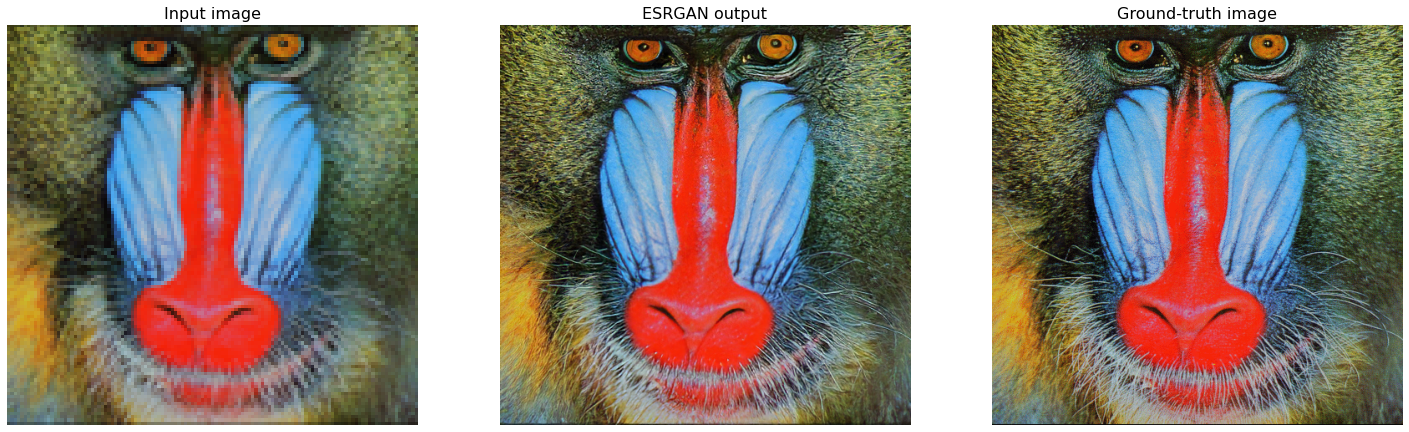

In [14]:
# lets test the model on a test image, very common image of a baboon
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img_input = imread('/content/BasicSR/datasets/Set14/LRbicx4/baboon.png')
img_esrgan = imread('/content/BasicSR/results/ESRGAN/baboon_ESRGAN.png')
img_gt = imread('/content/BasicSR/datasets/Set14/GTmod12/baboon.png')

# show and compare the results
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 3, 1) 
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('ESRGAN output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) 
plt.title('Ground-truth image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_esrgan)
ax3.imshow(img_gt)

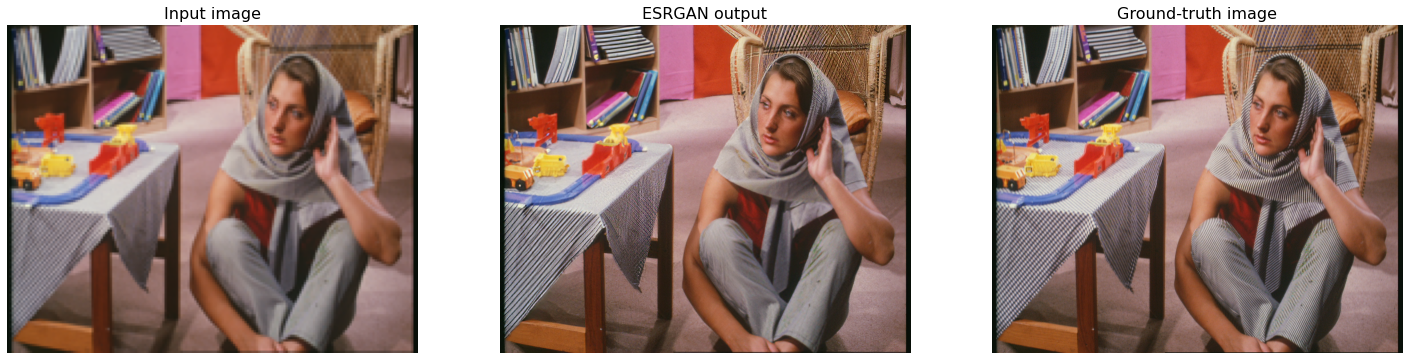

In [15]:
# lets get the quality of the images generated

import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images, get the input LR image, SR image and the ground truth image
img_input = imread('/content/BasicSR/datasets/Set14/LRbicx4/barbara.png')
img_esrgan = imread('/content/BasicSR/results/ESRGAN/barbara_ESRGAN.png')
img_gt = imread('/content/BasicSR/datasets/Set14/GTmod12/barbara.png')

# show and compare the results
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 3, 1) 
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('ESRGAN output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) 
plt.title('Ground-truth image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_esrgan)
ax3.imshow(img_gt)

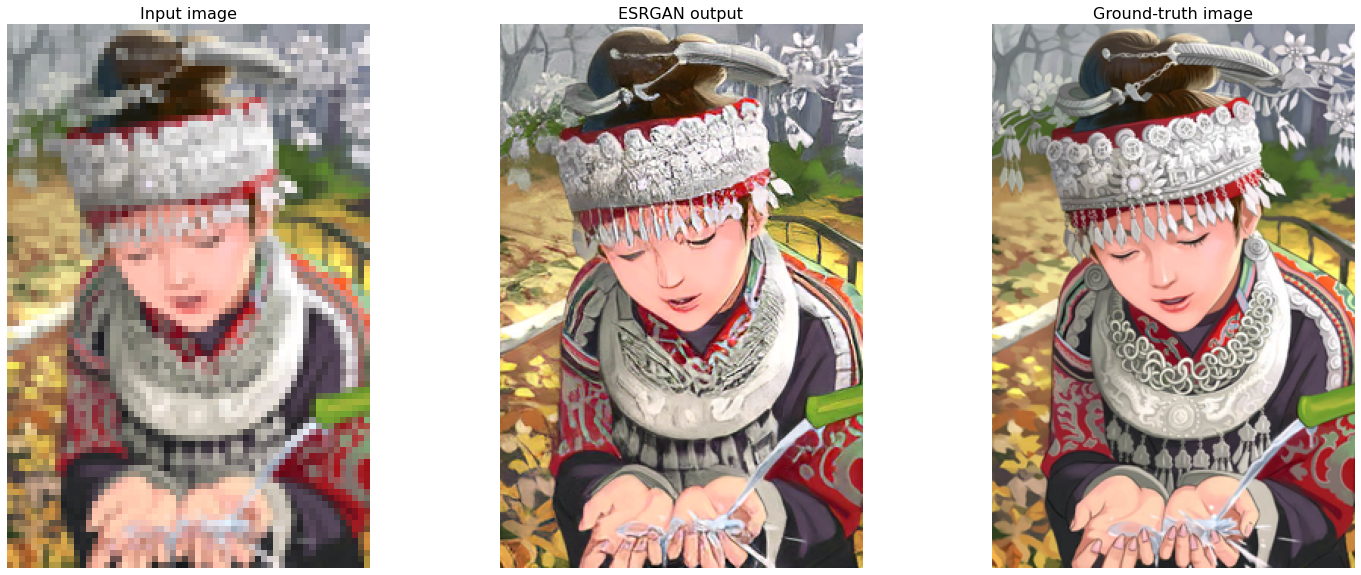

In [22]:
img_input = imread('/content/BasicSR/datasets/Set14/LRbicx4/comic.png')
img_esrgan = imread('/content/BasicSR/results/ESRGAN/comic_ESRGAN.png')
img_gt = imread('/content/BasicSR/datasets/Set14/GTmod12/comic.png')

# show and compare the results
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 3, 1) 
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('ESRGAN output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) 
plt.title('Ground-truth image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_esrgan)
ax3.imshow(img_gt)



# When we look at the images generated, it is just fascinating to see such an improved perceptual quality of the image generated.


In [32]:
import numpy as np
import glob
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return 20 * np.log10(255.0 / np.sqrt(mse))

In [50]:
list_esrgan = []
for filepath in glob.iglob('/content/BasicSR/results/ESRGAN/*.png'):
  list_esrgan.append(filepath)
list_esrgan.sort()

In [51]:
list_hr = []
for filepath in glob.iglob('/content/BasicSR/datasets/Set14/GTmod12/*.png'):
  list_hr.append(filepath)
list_hr.sort()

In [52]:
list_psnr = []
for i in range(len(list_esrgan)):
  img_hr = cv2.imread(list_hr[i])
  img_sr = cv2.imread(list_esrgan[i])
  list_psnr.append(psnr(img_hr, img_sr))

In [53]:
np.mean(list_psnr)

31.211535879061532